<a href="https://colab.research.google.com/github/ninemoonz/deepLearning/blob/main/NLP_IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP (Natural Language Process) with IMDb Movie Reviews
- RNN(Recurrent Neural Network): A algorithm for sequence data analysis (data has order)


In [1]:
# Library Config
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Random seed fixing
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## 4-1 IMDb Movie Review Dataset

In [2]:
from tensorflow.keras import datasets
imdb = datasets.imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000, index_from=3)

# num_words is the 'Bag of Words' which stores most frequently used words

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,) (25000,) (25000,)


In [3]:
# extracting first review vector
print(x_train[0])

# each number represent a single word
# word is mapped with number in 1:1 concept to be run in deep learning model

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# length of vector of first review
len(x_train[0])

218

In [5]:
word_index = imdb.get_word_index()
word_index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
# index to original word sentences

def decode_review_vector(review_vector):
  index_to_word = {value:key for key, value in word_index.items()}
  decoded_review = ' '.join([index_to_word.get(idx - 3, '?') for idx in review_vector])
  return decoded_review

decode_review_vector(x_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
y_train[0]

# 1 means positive review
# 0 means negative review

1

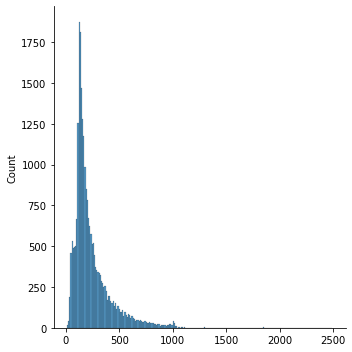

In [8]:
# distribution of number of words on each review

review_length = [len(review) for review in x_train]
sns.displot(review_length)

## 4-2 Zero Padding
- the length of each review is different
- in order to run on deep learning model, the length of the review must be even
- Set a max length
  - if the length of the review is longer than the max length, cut it off
  - if the length of the review is shorter, fill in the lacking length with 0 to even out






In [9]:
# Padding
from tensorflow.keras.preprocessing import sequence

x_train_pad = sequence.pad_sequences(x_train, maxlen=250)
x_test_pad = sequence.pad_sequences(x_test, maxlen=250)

print(x_train_pad[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    1   14   22   16   43  530  973 1622 1385   65
  458 4468   66 3941    4  173   36  256    5   25  100   43  838  112
   50  670    2    9   35  480  284    5  150    4  172  112  167    2
  336  385   39    4  172 4536 1111   17  546   38   13  447    4  192
   50   16    6  147 2025   19   14   22    4 1920 4613  469    4   22
   71   87   12   16   43  530   38   76   15   13 1247    4   22   17
  515   17   12   16  626   18    2    5   62  386   12    8  316    8
  106    5    4 2223 5244   16  480   66 3785   33    4  130   12   16
   38  619    5   25  124   51   36  135   48   25 1415   33    6   22
   12  215   28   77   52    5   14  407   16   82    2    8    4  107
  117 5952   15  256    4    2    7 3766    5  723   36   71   43  530
  476   26  400  317   46    7    4    2 1029   13  104   88    4  381
   15 

## 4-3 Word Embedding

1. When we make one hot encoding with the Bow of each review, most of the review will fill in the columns with 0, because we set the size of the each review as 250. (This is called sparse vector)

2. In this case, we can not train the model with enough information such as the languistic features like the continuity or similarity between words

3. Word Embedding is to overcome this kind of issues. It learns the correlation between words and place the similar words in the vector space.

4. In this case, we can express the correlation between words with direction and distance



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU

def build_model(model_type='RNN'):
  model = Sequential()

  #Embedding
  model.add(Embedding(input_dim=10000, output_dim=128))

  # RNN (Recurrent Neural Network)
  if model_type == 'RNN':
    model.add(SimpleRNN(units=64, return_sequences=True))
    model.add(SimpleRNN(units=64))
  
  # LSTM
  elif model_type == 'LSTM':
    model.add(LSTM(units=64, return_sequences=True))
    model.add(LSTM(units=64))

  # GRU
  elif model_type == 'GRU':
    model.add(GRU(units=64, return_sequences=True))
    model.add(GRU(units=64))

  # Dense Classifier
  model.add(Dense(units=32, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(units=1, activation='sigmoid'))

  # Compile
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model


## 4-4 RNN 

In [11]:
rnn_model = build_model('RNN')
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,302,721
Trainable params: 1,302,721
Non-

In [12]:
rnn_history=rnn_model.fit(x_train_pad, y_train, batch_size=32, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
704/704 - 101s - loss: 0.6980 - accuracy: 0.5079 - val_loss: 0.6910 - val_accuracy: 0.5704 - 101s/epoch - 144ms/step
Epoch 2/10
704/704 - 100s - loss: 0.5969 - accuracy: 0.6783 - val_loss: 0.5262 - val_accuracy: 0.7340 - 100s/epoch - 142ms/step
Epoch 3/10
704/704 - 99s - loss: 0.5245 - accuracy: 0.7374 - val_loss: 0.4419 - val_accuracy: 0.7904 - 99s/epoch - 141ms/step
Epoch 4/10
704/704 - 99s - loss: 0.4325 - accuracy: 0.8129 - val_loss: 0.5099 - val_accuracy: 0.7600 - 99s/epoch - 140ms/step
Epoch 5/10
704/704 - 99s - loss: 0.5488 - accuracy: 0.7184 - val_loss: 0.4551 - val_accuracy: 0.7992 - 99s/epoch - 140ms/step
Epoch 6/10
704/704 - 99s - loss: 0.5564 - accuracy: 0.7171 - val_loss: 0.5626 - val_accuracy: 0.7132 - 99s/epoch - 140ms/step
Epoch 7/10
704/704 - 99s - loss: 0.5496 - accuracy: 0.7326 - val_loss: 0.5737 - val_accuracy: 0.6948 - 99s/epoch - 140ms/step
Epoch 8/10
704/704 - 99s - loss: 0.5420 - accuracy: 0.7381 - val_loss: 0.5930 - val_accuracy: 0.6732 - 99s/epoch -

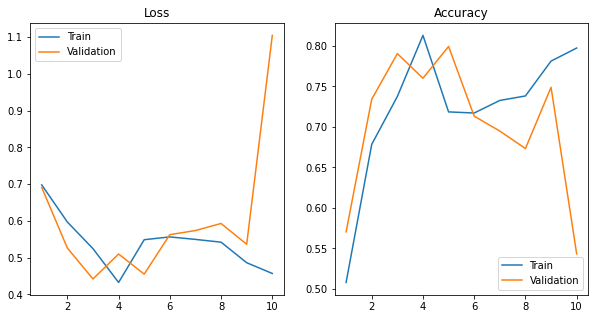

In [13]:
def plot_metrics(history, start=1, end=20):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  #Loss
  axes[0].plot(range(start, end+1), history.history['loss'][start-1:end], label='Train')
  axes[0].plot(range(start, end+1), history.history['val_loss'][start-1:end], label='Validation')
  axes[0].set_title('Loss')
  axes[0].legend()

  #Accuracy
  axes[1].plot(range(start, end+1), history.history['accuracy'][start-1:end], label='Train')
  axes[1].plot(range(start, end+1), history.history['val_accuracy'][start-1:end], label='Validation')
  axes[1].set_title('Accuracy')
  axes[1].legend()

plt.show()

plot_metrics(history=rnn_history, start=1, end=10)

## 4-5 LSTM
- Long Short Term Memory
- A model covers the weak point of RNN
- Long term Memory goes on in Cell State


Epoch 1/10
704/704 - 243s - loss: 0.4248 - accuracy: 0.8083 - val_loss: 0.3547 - val_accuracy: 0.8420 - 243s/epoch - 345ms/step
Epoch 2/10
704/704 - 235s - loss: 0.2649 - accuracy: 0.9008 - val_loss: 0.3154 - val_accuracy: 0.8760 - 235s/epoch - 333ms/step
Epoch 3/10
704/704 - 236s - loss: 0.1826 - accuracy: 0.9345 - val_loss: 0.3520 - val_accuracy: 0.8472 - 236s/epoch - 336ms/step
Epoch 4/10
704/704 - 235s - loss: 0.1280 - accuracy: 0.9570 - val_loss: 0.4074 - val_accuracy: 0.8384 - 235s/epoch - 334ms/step
Epoch 5/10
704/704 - 233s - loss: 0.1012 - accuracy: 0.9677 - val_loss: 0.4592 - val_accuracy: 0.8028 - 233s/epoch - 332ms/step
Epoch 6/10
704/704 - 234s - loss: 0.0921 - accuracy: 0.9699 - val_loss: 0.4139 - val_accuracy: 0.8456 - 234s/epoch - 332ms/step
Epoch 7/10
704/704 - 235s - loss: 0.0783 - accuracy: 0.9752 - val_loss: 0.5353 - val_accuracy: 0.8560 - 235s/epoch - 333ms/step
Epoch 8/10
704/704 - 235s - loss: 0.0545 - accuracy: 0.9817 - val_loss: 0.6496 - val_accuracy: 0.8496 - 

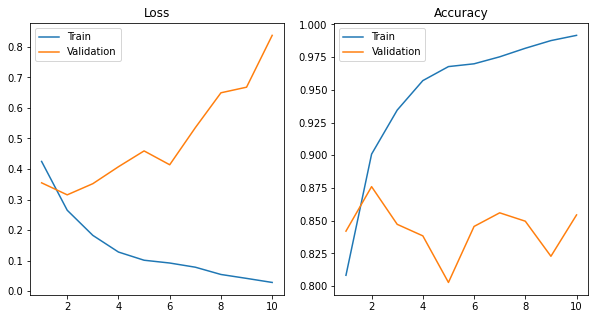

In [15]:
# LSTM model
lstm_model = build_model('LSTM')

lstm_history = lstm_model.fit(x_train_pad, y_train, batch_size=32, epochs=10, validation_split=0.1, verbose=2)
plot_metrics(history=lstm_history, start=1, end=10)

# takes too much time 
# about 4 minutes per epoch and over 40 min for whole model learning

## 4-6 GRU (Gated Recurrent Unit)
- This model improves the slow process of LSTM

Epoch 1/10
704/704 - 218s - loss: 0.4462 - accuracy: 0.7920 - val_loss: 0.3292 - val_accuracy: 0.8724 - 218s/epoch - 309ms/step
Epoch 2/10
704/704 - 210s - loss: 0.2648 - accuracy: 0.8991 - val_loss: 0.3008 - val_accuracy: 0.8808 - 210s/epoch - 299ms/step
Epoch 3/10
704/704 - 209s - loss: 0.1671 - accuracy: 0.9422 - val_loss: 0.3430 - val_accuracy: 0.8784 - 209s/epoch - 297ms/step
Epoch 4/10
704/704 - 209s - loss: 0.1040 - accuracy: 0.9650 - val_loss: 0.4032 - val_accuracy: 0.8688 - 209s/epoch - 297ms/step
Epoch 5/10
704/704 - 210s - loss: 0.0596 - accuracy: 0.9798 - val_loss: 0.4692 - val_accuracy: 0.8632 - 210s/epoch - 299ms/step
Epoch 6/10
704/704 - 210s - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.5379 - val_accuracy: 0.8640 - 210s/epoch - 298ms/step
Epoch 7/10
704/704 - 210s - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.7055 - val_accuracy: 0.8732 - 210s/epoch - 298ms/step
Epoch 8/10
704/704 - 211s - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.7495 - val_accuracy: 0.8676 - 

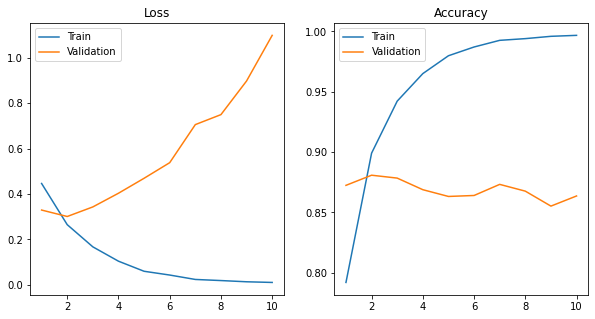

In [16]:
# GRU MODEL
gru_model = build_model('GRU')

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gru_history = gru_model.fit(x_train_pad, y_train, batch_size=32, epochs=10, validation_split=0.1, verbose=2)

plot_metrics(history=gru_history, start=1, end=10)